In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
import tensorflow as tf

In [22]:
df = pd.read_csv("data.csv")
df = df.rename(columns={"tension_strenght": "tensile_strength"})
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tensile_strength    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [24]:
for column in df.columns:
    print(str(column)+": "+str(df[column].unique()))
    print()

layer_height: [0.02 0.06 0.1  0.15 0.2 ]

wall_thickness: [ 8  7  1  4  6 10  5  9  2  3]

infill_density: [90 80 70 40 10 20 50 30 60]

infill_pattern: ['grid' 'honeycomb']

nozzle_temperature: [220 225 230 240 250 200 205 210 215]

bed_temperature: [60 65 70 75 80]

print_speed: [ 40  60 120]

material: ['abs' 'pla']

fan_speed: [  0  25  50  75 100]

roughness: [ 25  32  40  68  92  60  55  21  24  30  75 118 200 220 126 145  88  74
 120 144 265 312 368 180 176 128 138 121 168 154 225 289 326 192 212 172
 163 276 298 360 357 321 278 244]

tensile_strength: [18 16  8 10  5 24 12 14 27 25 37  9 23 26 33 29 19 11 34 13 22  4 35 28
 21 30]

elongation: [1.2 1.4 0.8 0.5 0.7 1.1 1.3 1.5 1.7 2.4 1.  2.2 1.9 1.6 2.1 2.  0.9 0.4
 1.8 2.9 0.6 2.8 2.3 3.3 3.1 2.7 3.2]



In [25]:
#In this data set, ABS and PLA assigned 0 and 1 values for materials (abs = 0, pla = 1)
df.material = [0 if each=='abs' else 1 for each in df.material]

#In this data set, grid and honeycomb assigned 0 and 1 values for infill_pattern (grid = 0, honeycomb = 1)
df.infill_pattern = [0 if each=='grid' else 1 for each in df.infill_pattern]

df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


In [26]:
df.layer_height = df.layer_height*100
df.elongation = df.elongation*100

In [27]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,2.0,8,90,0,220,60,40,0,0,25,18,120.0
1,2.0,7,90,1,225,65,40,0,25,32,16,140.0
2,2.0,1,80,0,230,70,40,0,50,40,8,80.0
3,2.0,4,70,1,240,75,40,0,75,68,10,50.0
4,2.0,6,90,0,250,80,40,0,100,92,5,70.0


In [28]:
target_cols = ['tensile_strength', 'roughness', 'elongation']
Y = df[target_cols]
X = df.drop(target_cols,axis=1)

In [29]:
selectedtodrop = ['infill_pattern', 'wall_thickness']
X_selected = X.drop(selectedtodrop, axis=1)
X_selected.head()

,layer_height,infill_density,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,2.0,90,220,60,40,0,0
1,2.0,90,225,65,40,0,25
2,2.0,80,230,70,40,0,50
3,2.0,70,240,75,40,0,75
4,2.0,90,250,80,40,0,100


In [30]:
dropnew = ['infill_pattern', 'wall_thickness']
dfnew = df.drop(dropnew, axis=1)
dfnew.head()

,layer_height,infill_density,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,2.0,90,220,60,40,0,0,25,18,120.0
1,2.0,90,225,65,40,0,25,32,16,140.0
2,2.0,80,230,70,40,0,50,40,8,80.0
3,2.0,70,240,75,40,0,75,68,10,50.0
4,2.0,90,250,80,40,0,100,92,5,70.0


In [31]:
X = X_selected.values
Y = Y.values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.09)
print(X_train.shape)
print(Y_test.shape)

(45, 7)
(5, 3)


In [33]:
# Construct a NN model using functional API
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Dropout, Activation, Flatten

inputvec = Input( shape=(7,) )
x = Dense( 16, activation='relu' )(inputvec)
x = Dense( 32, activation='relu' )(x)
x = Dense( 64, activation='relu' )(x)
#x = Dropout(0.5)(x)
x = Dense( 32, activation='relu' )(x)
x = Dense( 16, activation='relu' )(x)
x = Dense( 8, activation='relu' )(x)
#x = Dropout(0.25)(x)
preds = Dense(3, activation='linear' )(x)

model = Model(name= 'NN_model_2', inputs = inputvec,outputs=preds)
model.summary()

Model: "NN_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense_7 (Dense)             (None, 16)                128       
                                                                 
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 8)                 1

In [34]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Fold 1
Epoch 1/100
9/9 [==============================] - 0s 16ms/step - loss: 23173.8574 - accuracy: 0.4222 - val_loss: 23881.4844 - val_accuracy: 0.4000
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 19165.0605 - accuracy: 0.5556 - val_loss: 18742.0098 - val_accuracy: 0.6000
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 13879.7598 - accuracy: 0.5778 - val_loss: 11937.4141 - val_accuracy: 0.6000
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 8693.7412 - accuracy: 0.5778 - val_loss: 6386.9346 - val_accuracy: 0.6000
Epoch 5/100
9/9 [==============================] - 0s 4ms/step - loss: 5906.1138 - accuracy: 0.5778 - val_loss: 4649.6714 - val_accuracy: 0.6000
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 5472.2153 - accuracy: 0.4222 - val_loss: 5187.2373 - val_accuracy: 0.4000
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 5425.8965 - accuracy: 0.4222 - val_loss: 5114

9/9 [==============================] - 0s 4ms/step - loss: 3530.5527 - accuracy: 0.5333 - val_loss: 5401.7959 - val_accuracy: 0.6000
Epoch 58/100
9/9 [==============================] - 0s 4ms/step - loss: 3372.8550 - accuracy: 0.5778 - val_loss: 5226.2612 - val_accuracy: 0.6000
Epoch 59/100
9/9 [==============================] - 0s 4ms/step - loss: 3547.0981 - accuracy: 0.5333 - val_loss: 5141.0840 - val_accuracy: 0.8000
Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 3274.6096 - accuracy: 0.6000 - val_loss: 5368.0400 - val_accuracy: 0.6000
Epoch 61/100
9/9 [==============================] - 0s 4ms/step - loss: 3191.6746 - accuracy: 0.5556 - val_loss: 5157.8501 - val_accuracy: 0.8000
Epoch 62/100
9/9 [==============================] - 0s 4ms/step - loss: 3173.4424 - accuracy: 0.5778 - val_loss: 5460.9443 - val_accuracy: 0.6000
Epoch 63/100
9/9 [==============================] - 0s 4ms/step - loss: 3109.1206 - accuracy: 0.5778 - val_loss: 5230.0830 - val_accuracy

Epoch 13/100
9/9 [==============================] - 0s 4ms/step - loss: 2003.3844 - accuracy: 0.7333 - val_loss: 2728.0906 - val_accuracy: 0.4000
Epoch 14/100
9/9 [==============================] - 0s 4ms/step - loss: 1972.6483 - accuracy: 0.6667 - val_loss: 2548.6641 - val_accuracy: 0.4000
Epoch 15/100
9/9 [==============================] - 0s 4ms/step - loss: 1939.0160 - accuracy: 0.6667 - val_loss: 3028.2554 - val_accuracy: 0.4000
Epoch 16/100
9/9 [==============================] - 0s 4ms/step - loss: 2006.8005 - accuracy: 0.6889 - val_loss: 2717.3757 - val_accuracy: 0.4000
Epoch 17/100
9/9 [==============================] - 0s 4ms/step - loss: 2002.6489 - accuracy: 0.7111 - val_loss: 2827.1001 - val_accuracy: 0.4000
Epoch 18/100
9/9 [==============================] - 0s 4ms/step - loss: 1913.1115 - accuracy: 0.7111 - val_loss: 2612.4124 - val_accuracy: 0.4000
Epoch 19/100
9/9 [==============================] - 0s 4ms/step - loss: 2092.4302 - accuracy: 0.7111 - val_loss: 2388.8496 -

9/9 [==============================] - 0s 4ms/step - loss: 1734.4708 - accuracy: 0.7556 - val_loss: 2976.4270 - val_accuracy: 0.4000
Epoch 70/100
9/9 [==============================] - 0s 4ms/step - loss: 1791.3330 - accuracy: 0.7556 - val_loss: 2763.0430 - val_accuracy: 0.4000
Epoch 71/100
9/9 [==============================] - 0s 4ms/step - loss: 1727.6727 - accuracy: 0.7556 - val_loss: 2971.4102 - val_accuracy: 0.4000
Epoch 72/100
9/9 [==============================] - 0s 3ms/step - loss: 1731.5239 - accuracy: 0.7556 - val_loss: 2782.4792 - val_accuracy: 0.4000
Epoch 73/100
9/9 [==============================] - 0s 3ms/step - loss: 1701.9653 - accuracy: 0.7556 - val_loss: 2570.4814 - val_accuracy: 0.4000
Epoch 74/100
9/9 [==============================] - 0s 4ms/step - loss: 1618.7516 - accuracy: 0.7778 - val_loss: 2758.0347 - val_accuracy: 0.4000
Epoch 75/100
9/9 [==============================] - 0s 4ms/step - loss: 1600.6321 - accuracy: 0.7778 - val_loss: 2941.8535 - val_accuracy

9/9 [==============================] - 0s 4ms/step - loss: 1440.2368 - accuracy: 0.7556 - val_loss: 1888.4401 - val_accuracy: 0.4000
Epoch 26/100
9/9 [==============================] - 0s 4ms/step - loss: 1360.9288 - accuracy: 0.7556 - val_loss: 1870.5990 - val_accuracy: 0.4000
Epoch 27/100
9/9 [==============================] - 0s 4ms/step - loss: 1506.8800 - accuracy: 0.7333 - val_loss: 1947.8961 - val_accuracy: 0.4000
Epoch 28/100
9/9 [==============================] - 0s 4ms/step - loss: 1627.0309 - accuracy: 0.7778 - val_loss: 1863.0896 - val_accuracy: 0.4000
Epoch 29/100
9/9 [==============================] - 0s 4ms/step - loss: 1410.0322 - accuracy: 0.7556 - val_loss: 1870.9996 - val_accuracy: 0.4000
Epoch 30/100
9/9 [==============================] - 0s 4ms/step - loss: 1328.3478 - accuracy: 0.7778 - val_loss: 1616.4102 - val_accuracy: 0.4000
Epoch 31/100
9/9 [==============================] - 0s 3ms/step - loss: 1257.5112 - accuracy: 0.7556 - val_loss: 2178.6794 - val_accuracy

9/9 [==============================] - 0s 4ms/step - loss: 887.2035 - accuracy: 0.7333 - val_loss: 2266.4971 - val_accuracy: 0.4000
Epoch 82/100
9/9 [==============================] - 0s 4ms/step - loss: 755.5118 - accuracy: 0.7778 - val_loss: 2290.4099 - val_accuracy: 0.6000
Epoch 83/100
9/9 [==============================] - 0s 4ms/step - loss: 977.8301 - accuracy: 0.7778 - val_loss: 2643.5889 - val_accuracy: 0.4000
Epoch 84/100
9/9 [==============================] - 0s 4ms/step - loss: 1128.8704 - accuracy: 0.8000 - val_loss: 2842.1665 - val_accuracy: 0.4000
Epoch 85/100
9/9 [==============================] - 0s 4ms/step - loss: 954.4396 - accuracy: 0.7556 - val_loss: 2161.5337 - val_accuracy: 0.6000
Epoch 86/100
9/9 [==============================] - 0s 4ms/step - loss: 908.1915 - accuracy: 0.8444 - val_loss: 3337.4661 - val_accuracy: 0.4000
Epoch 87/100
9/9 [==============================] - 0s 4ms/step - loss: 1206.8353 - accuracy: 0.7111 - val_loss: 2449.4636 - val_accuracy: 0.6

9/9 [==============================] - 0s 4ms/step - loss: 461.2527 - accuracy: 0.8889 - val_loss: 3005.6926 - val_accuracy: 0.4000
Epoch 38/100
9/9 [==============================] - 0s 4ms/step - loss: 523.8071 - accuracy: 0.8667 - val_loss: 2234.3289 - val_accuracy: 0.4000
Epoch 39/100
9/9 [==============================] - 0s 3ms/step - loss: 535.9938 - accuracy: 0.8667 - val_loss: 2186.0784 - val_accuracy: 0.2000
Epoch 40/100
9/9 [==============================] - 0s 4ms/step - loss: 439.9304 - accuracy: 0.9333 - val_loss: 2437.8975 - val_accuracy: 0.2000
Epoch 41/100
9/9 [==============================] - 0s 4ms/step - loss: 429.6429 - accuracy: 0.8667 - val_loss: 2620.8328 - val_accuracy: 0.2000
Epoch 42/100
9/9 [==============================] - 0s 4ms/step - loss: 451.5099 - accuracy: 0.8889 - val_loss: 2320.5586 - val_accuracy: 0.2000
Epoch 43/100
9/9 [==============================] - 0s 4ms/step - loss: 414.4293 - accuracy: 0.8889 - val_loss: 2485.2896 - val_accuracy: 0.200

9/9 [==============================] - 0s 4ms/step - loss: 284.9025 - accuracy: 0.8889 - val_loss: 2676.2148 - val_accuracy: 0.2000
Epoch 94/100
9/9 [==============================] - 0s 4ms/step - loss: 279.5996 - accuracy: 0.9333 - val_loss: 2851.8457 - val_accuracy: 0.2000
Epoch 95/100
9/9 [==============================] - 0s 4ms/step - loss: 290.6509 - accuracy: 0.9333 - val_loss: 3033.5278 - val_accuracy: 0.4000
Epoch 96/100
9/9 [==============================] - 0s 3ms/step - loss: 265.9470 - accuracy: 0.9111 - val_loss: 2989.7847 - val_accuracy: 0.2000
Epoch 97/100
9/9 [==============================] - 0s 4ms/step - loss: 261.5076 - accuracy: 0.9778 - val_loss: 2779.6372 - val_accuracy: 0.2000
Epoch 98/100
9/9 [==============================] - 0s 3ms/step - loss: 225.6103 - accuracy: 0.9333 - val_loss: 3252.8491 - val_accuracy: 0.2000
Epoch 99/100
9/9 [==============================] - 0s 4ms/step - loss: 209.7253 - accuracy: 0.9333 - val_loss: 2854.2271 - val_accuracy: 0.200

Epoch 50/100
9/9 [==============================] - 0s 4ms/step - loss: 301.1528 - accuracy: 0.9778 - val_loss: 708.1439 - val_accuracy: 0.8000
Epoch 51/100
9/9 [==============================] - 0s 4ms/step - loss: 289.5925 - accuracy: 0.9333 - val_loss: 531.3348 - val_accuracy: 0.8000
Epoch 52/100
9/9 [==============================] - 0s 3ms/step - loss: 233.3649 - accuracy: 0.9333 - val_loss: 614.5853 - val_accuracy: 0.8000
Epoch 53/100
9/9 [==============================] - 0s 3ms/step - loss: 287.0085 - accuracy: 0.9556 - val_loss: 678.5079 - val_accuracy: 0.8000
Epoch 54/100
9/9 [==============================] - 0s 4ms/step - loss: 300.8404 - accuracy: 0.8667 - val_loss: 697.0521 - val_accuracy: 1.0000
Epoch 55/100
9/9 [==============================] - 0s 3ms/step - loss: 268.5875 - accuracy: 0.8667 - val_loss: 655.9982 - val_accuracy: 0.8000
Epoch 56/100
9/9 [==============================] - 0s 4ms/step - loss: 266.2077 - accuracy: 0.9778 - val_loss: 578.7307 - val_accuracy:

9/9 [==============================] - 0s 3ms/step - loss: 187.8666 - accuracy: 0.9333 - val_loss: 181.5337 - val_accuracy: 1.0000
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 193.5989 - accuracy: 0.9778 - val_loss: 303.8924 - val_accuracy: 1.0000
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 237.4874 - accuracy: 0.9556 - val_loss: 250.6699 - val_accuracy: 1.0000
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 196.9693 - accuracy: 0.9556 - val_loss: 242.9500 - val_accuracy: 1.0000
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 212.3130 - accuracy: 0.9556 - val_loss: 186.6703 - val_accuracy: 1.0000
Epoch 11/100
9/9 [==============================] - 0s 4ms/step - loss: 202.2716 - accuracy: 0.9111 - val_loss: 326.5838 - val_accuracy: 1.0000
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 193.6061 - accuracy: 0.9556 - val_loss: 193.7188 - val_accuracy: 1.0000
Epoch 13

9/9 [==============================] - 0s 4ms/step - loss: 81.6907 - accuracy: 1.0000 - val_loss: 372.7999 - val_accuracy: 1.0000
Epoch 64/100
9/9 [==============================] - 0s 4ms/step - loss: 82.8135 - accuracy: 1.0000 - val_loss: 256.3949 - val_accuracy: 1.0000
Epoch 65/100
9/9 [==============================] - 0s 4ms/step - loss: 94.6728 - accuracy: 0.9556 - val_loss: 368.8362 - val_accuracy: 1.0000
Epoch 66/100
9/9 [==============================] - 0s 4ms/step - loss: 94.2184 - accuracy: 0.9556 - val_loss: 257.9295 - val_accuracy: 1.0000
Epoch 67/100
9/9 [==============================] - 0s 4ms/step - loss: 97.3228 - accuracy: 1.0000 - val_loss: 419.3634 - val_accuracy: 1.0000
Epoch 68/100
9/9 [==============================] - 0s 4ms/step - loss: 85.8524 - accuracy: 0.9778 - val_loss: 271.7408 - val_accuracy: 1.0000
Epoch 69/100
9/9 [==============================] - 0s 4ms/step - loss: 96.2623 - accuracy: 0.9778 - val_loss: 453.4022 - val_accuracy: 1.0000
Epoch 70/100

9/9 [==============================] - 0s 4ms/step - loss: 83.9388 - accuracy: 1.0000 - val_loss: 152.4046 - val_accuracy: 1.0000
Epoch 21/100
9/9 [==============================] - 0s 4ms/step - loss: 72.0957 - accuracy: 0.9778 - val_loss: 161.3434 - val_accuracy: 1.0000
Epoch 22/100
9/9 [==============================] - 0s 4ms/step - loss: 62.2413 - accuracy: 0.9778 - val_loss: 89.7468 - val_accuracy: 1.0000
Epoch 23/100
9/9 [==============================] - 0s 4ms/step - loss: 56.4665 - accuracy: 0.9778 - val_loss: 196.7508 - val_accuracy: 1.0000
Epoch 24/100
9/9 [==============================] - 0s 4ms/step - loss: 75.7104 - accuracy: 0.9778 - val_loss: 141.2156 - val_accuracy: 1.0000
Epoch 25/100
9/9 [==============================] - 0s 3ms/step - loss: 78.5879 - accuracy: 0.9556 - val_loss: 315.3753 - val_accuracy: 1.0000
Epoch 26/100
9/9 [==============================] - 0s 4ms/step - loss: 121.6459 - accuracy: 0.9778 - val_loss: 178.3812 - val_accuracy: 1.0000
Epoch 27/100

Epoch 77/100
9/9 [==============================] - 0s 4ms/step - loss: 74.9670 - accuracy: 1.0000 - val_loss: 331.0408 - val_accuracy: 1.0000
Epoch 78/100
9/9 [==============================] - 0s 4ms/step - loss: 87.5950 - accuracy: 0.9333 - val_loss: 358.3188 - val_accuracy: 1.0000
Epoch 79/100
9/9 [==============================] - 0s 4ms/step - loss: 83.4465 - accuracy: 0.9333 - val_loss: 219.6005 - val_accuracy: 1.0000
Epoch 80/100
9/9 [==============================] - 0s 4ms/step - loss: 67.7071 - accuracy: 0.9556 - val_loss: 198.7654 - val_accuracy: 1.0000
Epoch 81/100
9/9 [==============================] - 0s 4ms/step - loss: 63.3852 - accuracy: 1.0000 - val_loss: 269.8453 - val_accuracy: 1.0000
Epoch 82/100
9/9 [==============================] - 0s 4ms/step - loss: 49.9996 - accuracy: 0.9778 - val_loss: 171.0708 - val_accuracy: 1.0000
Epoch 83/100
9/9 [==============================] - 0s 4ms/step - loss: 51.1535 - accuracy: 0.9778 - val_loss: 188.7977 - val_accuracy: 1.0000

9/9 [==============================] - 0s 4ms/step - loss: 59.3423 - accuracy: 0.9778 - val_loss: 303.3849 - val_accuracy: 0.8000
Epoch 35/100
9/9 [==============================] - 0s 4ms/step - loss: 67.2792 - accuracy: 0.9556 - val_loss: 626.3014 - val_accuracy: 0.6000
Epoch 36/100
9/9 [==============================] - 0s 4ms/step - loss: 153.5719 - accuracy: 0.9778 - val_loss: 239.5285 - val_accuracy: 0.8000
Epoch 37/100
9/9 [==============================] - 0s 4ms/step - loss: 130.3995 - accuracy: 0.9556 - val_loss: 84.9933 - val_accuracy: 0.8000
Epoch 38/100
9/9 [==============================] - ETA: 0s - loss: 113.9169 - accuracy: 1.00 - 0s 4ms/step - loss: 144.7505 - accuracy: 0.9556 - val_loss: 50.7148 - val_accuracy: 1.0000
Epoch 39/100
9/9 [==============================] - 0s 4ms/step - loss: 156.0877 - accuracy: 0.9556 - val_loss: 119.5135 - val_accuracy: 1.0000
Epoch 40/100
9/9 [==============================] - 0s 3ms/step - loss: 202.9529 - accuracy: 0.9111 - val_los

9/9 [==============================] - 0s 4ms/step - loss: 34.3565 - accuracy: 0.9778 - val_loss: 222.2212 - val_accuracy: 0.8000
Epoch 92/100
9/9 [==============================] - 0s 4ms/step - loss: 25.4413 - accuracy: 0.9778 - val_loss: 291.3463 - val_accuracy: 0.8000
Epoch 93/100
9/9 [==============================] - 0s 4ms/step - loss: 19.2438 - accuracy: 0.9778 - val_loss: 348.4966 - val_accuracy: 0.8000
Epoch 94/100
9/9 [==============================] - 0s 4ms/step - loss: 18.7633 - accuracy: 1.0000 - val_loss: 279.4645 - val_accuracy: 0.8000
Epoch 95/100
9/9 [==============================] - 0s 4ms/step - loss: 14.2169 - accuracy: 0.9778 - val_loss: 248.3368 - val_accuracy: 0.8000
Epoch 96/100
9/9 [==============================] - 0s 4ms/step - loss: 11.5363 - accuracy: 1.0000 - val_loss: 305.2785 - val_accuracy: 0.8000
Epoch 97/100
9/9 [==============================] - 0s 4ms/step - loss: 10.8398 - accuracy: 1.0000 - val_loss: 234.5601 - val_accuracy: 0.8000
Epoch 98/100

9/9 [==============================] - 0s 4ms/step - loss: 20.4622 - accuracy: 1.0000 - val_loss: 26.8318 - val_accuracy: 1.0000
Epoch 49/100
9/9 [==============================] - 0s 6ms/step - loss: 18.0398 - accuracy: 0.9778 - val_loss: 23.8876 - val_accuracy: 1.0000
Epoch 50/100
9/9 [==============================] - 0s 4ms/step - loss: 18.3818 - accuracy: 0.9778 - val_loss: 27.1251 - val_accuracy: 1.0000
Epoch 51/100
9/9 [==============================] - 0s 4ms/step - loss: 17.9012 - accuracy: 0.9778 - val_loss: 29.6846 - val_accuracy: 1.0000
Epoch 52/100
9/9 [==============================] - 0s 4ms/step - loss: 23.9631 - accuracy: 1.0000 - val_loss: 53.3922 - val_accuracy: 1.0000
Epoch 53/100
9/9 [==============================] - 0s 4ms/step - loss: 41.1236 - accuracy: 0.9778 - val_loss: 21.1846 - val_accuracy: 1.0000
Epoch 54/100
9/9 [==============================] - 0s 4ms/step - loss: 64.5587 - accuracy: 0.9778 - val_loss: 24.2308 - val_accuracy: 1.0000
Epoch 55/100
9/9 [=

9/9 [==============================] - 0s 4ms/step - loss: 12.7899 - accuracy: 0.9778 - val_loss: 11.7770 - val_accuracy: 1.0000
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 14.1177 - accuracy: 1.0000 - val_loss: 15.8819 - val_accuracy: 1.0000
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 17.5831 - accuracy: 0.9778 - val_loss: 34.2548 - val_accuracy: 1.0000
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 17.9074 - accuracy: 1.0000 - val_loss: 30.9911 - val_accuracy: 1.0000
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 13.9411 - accuracy: 0.9778 - val_loss: 18.6343 - val_accuracy: 1.0000
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 10.0917 - accuracy: 0.9778 - val_loss: 13.3594 - val_accuracy: 1.0000
Epoch 11/100
9/9 [==============================] - 0s 4ms/step - loss: 8.4383 - accuracy: 1.0000 - val_loss: 23.5485 - val_accuracy: 1.0000
Epoch 12/100
9/9 [======

9/9 [==============================] - 0s 4ms/step - loss: 3.1191 - accuracy: 0.9778 - val_loss: 34.6561 - val_accuracy: 1.0000
Epoch 64/100
9/9 [==============================] - 0s 4ms/step - loss: 3.6613 - accuracy: 0.9778 - val_loss: 31.9341 - val_accuracy: 1.0000
Epoch 65/100
9/9 [==============================] - 0s 4ms/step - loss: 3.1042 - accuracy: 0.9778 - val_loss: 36.9504 - val_accuracy: 1.0000
Epoch 66/100
9/9 [==============================] - 0s 4ms/step - loss: 3.1574 - accuracy: 1.0000 - val_loss: 42.1206 - val_accuracy: 1.0000
Epoch 67/100
9/9 [==============================] - 0s 4ms/step - loss: 3.2187 - accuracy: 0.9778 - val_loss: 42.9209 - val_accuracy: 1.0000
Epoch 68/100
9/9 [==============================] - 0s 4ms/step - loss: 3.1487 - accuracy: 1.0000 - val_loss: 35.2484 - val_accuracy: 1.0000
Epoch 69/100
9/9 [==============================] - 0s 4ms/step - loss: 3.0141 - accuracy: 0.9778 - val_loss: 36.4992 - val_accuracy: 1.0000
Epoch 70/100
9/9 [========

Text(0, 0.5, 'mean squared error')

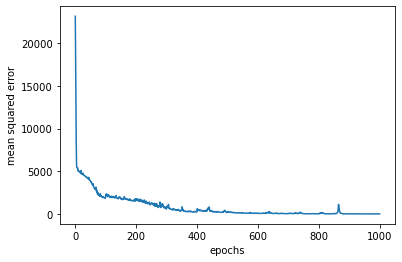

In [35]:
from keras.callbacks import History
history = History()

for n, (tr, te) in enumerate(KFold(n_splits=10, shuffle=True).split(X)):
    print(f'Fold {n+1}')

    model.fit(X[tr],Y.astype(float)[tr],
                validation_data=(X[te], Y.astype(float)[te]),
                epochs=100, batch_size=5, verbose=1, callbacks=[history])
    print('')
    
# Plot the loss history
plt.plot(history.history['loss'])
plt.xlabel("epochs")
plt.ylabel("mean squared error")

Text(0, 0.5, 'mean squared error')

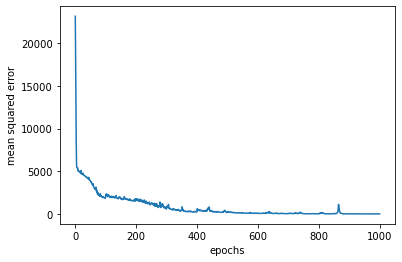

In [39]:
# Plot the loss history
plt.plot(history.history['loss'])
plt.xlabel("epochs")
plt.ylabel("mean squared error")

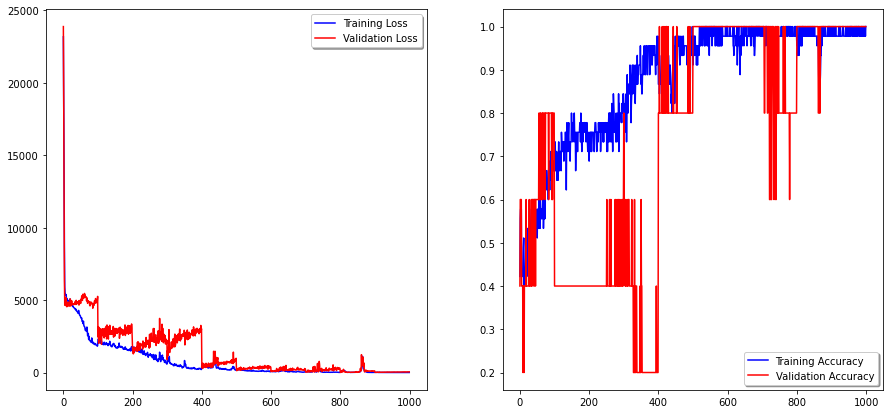

In [40]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss') 
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_accuracy'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

1/1 [==============================] - 0s 90ms/step - loss: 49.4785 - accuracy: 1.0000
[49.47853469848633, 1.0]


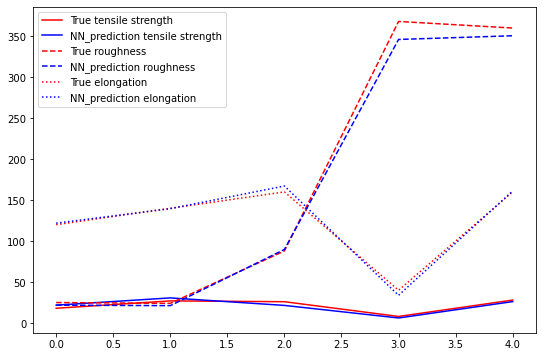

In [41]:
# Evaluate the accuracy of the model (loss: mean squared error, as defined in the step of compiling)
score = model.evaluate(X[te], Y[te], verbose=1)
print(score)

# Batch prediction & plot
Y_pred = model.predict(X[te])

plt.show()
plt.figure(figsize=(9, 6))
line1, = plt.plot(Y[te][:,0],'r-')
line2, = plt.plot(Y_pred[:,0],'b-')
line3, = plt.plot(Y[te][:,1],'r--')
line4, = plt.plot(Y_pred[:,1],'b--')
line5, = plt.plot(Y[te][:,2],'r:')
line6, = plt.plot(Y_pred[:,2],'b:')
plt.legend([line1, line2, line3, line4, line5, line6], ['True tensile strength', 'NN_prediction tensile strength', 'True roughness', 'NN_prediction roughness', 'True elongation', 'NN_prediction elongation'])